In [1]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
IMAGE_PATH = 'aadhar1.jpeg'

In [3]:
def sharpen_image(image):
    # Create a sharpening kernel
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])

    # Apply the sharpening kernel to the image
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image


In [4]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[460, 158], [524, 158], [524, 184], [460, 184]], 'MRT', 0.3768778570313753),
 ([[532, 158], [614, 158], [614, 184], [532, 184]],
  'HrER',
  0.06851549446582794),
 ([[418, 186], [654, 186], [654, 212], [418, 212]],
  'GOVERNMENT OF INDIA',
  0.989994932873659),
 ([[357, 229], [479, 229], [479, 265], [357, 265]],
  's0686',
  0.42170899259126127),
 ([[362, 276], [516, 276], [516, 306], [362, 306]],
  'Name XXXX',
  0.9992611235312325),
 ([[362, 306], [600, 306], [600, 336], [362, 336]],
  'DOB: XX-XX-XXXX',
  0.9965055624198419),
 ([[362, 338], [550, 338], [550, 368], [362, 368]],
  'Gender: MALE',
  0.8209236286122255),
 ([[351, 437], [627, 437], [627, 479], [351, 479]],
  '0000 M1 2222',
  0.6259106119481269),
 ([[311, 495], [680, 495], [680, 533], [311, 533]],
  '31e11r - 34 314ft #T3ferR',
  0.023172892122135406)]

In [5]:
detected_text_list = []
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

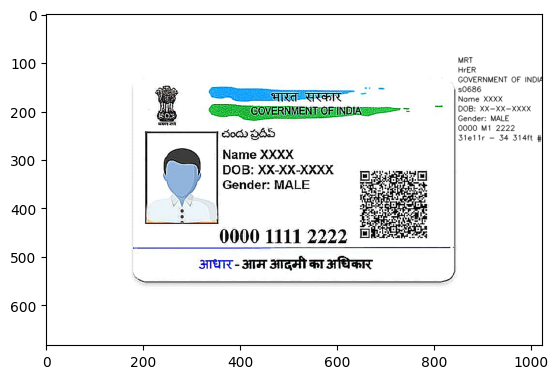

In [6]:
image = cv2.imread(IMAGE_PATH)
img= sharpen_image(image)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    #img= cv2.rectangle(img, tuple(top_left), tuple(bottom_right), (0, 255, 0), 2)
    #img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),2)
    img = cv2.putText(img,text,(850,spacer), font, 0.5,(0,0,0),1,cv2.LINE_AA)
    detected_text_list.append(text)
    spacer+=20
    
plt.imshow(img)
plt.show()

In [7]:
detected_text_list

['MRT',
 'HrER',
 'GOVERNMENT OF INDIA',
 's0686',
 'Name XXXX',
 'DOB: XX-XX-XXXX',
 'Gender: MALE',
 '0000 M1 2222',
 '31e11r - 34 314ft #T3ferR']

In [14]:
def print_details():
    for i in range(len(detected_text_list)):
        if "Name" in detected_text_list[i]:
            print(detected_text_list[i])
        elif "DOB" in detected_text_list[i]:
            print(detected_text_list[i])
        elif "Gender" in detected_text_list[i]:
            print(detected_text_list[i])

    print(detected_text_list[len(detected_text_list)-2])


In [16]:
print_details()

Name XXXX
DOB: XX-XX-XXXX
Gender: MALE
0000 M1 2222


In [74]:
file_path = 'detected_text.txt'
with open(file_path, 'w') as file:
    for text in detected_text:
        file.write(text + '\n')
print(f"Detected text saved to '{file_path}'.")

Detected text saved to 'detected_text.txt'.
